# Surface Plot

This notebook aims at plotting the surface of non-dominated solutions for our planning problem.

In [1]:
%matplotlib widget

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt

from src.utils import get_instance, display_time_table
from src.build_model import build_model
from src.compute_surface import compute_non_dominated_surface, save_non_dominated_surface, load_non_dominated_surface

## Compute Non-Dominated Surface

In [9]:
instance_filename = "toy_instance.json"
data = get_instance(instance_filename)
model = build_model(data, with_epsilon_constraint=True)
t0 = time.time()
non_dominated_models = compute_non_dominated_surface(model, data)
print(f"Time spent: {time.time() - t0}")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-11
max_duration <= 5, max_assigned <= 5
Objective: 64.987, max_duration: 3, max_assigned: 2

max_duration <= 5, max_assigned <= 1
Objective: 41.992, max_duration: 3, max_assigned: 1

max_duration <= 2, max_assigned <= 5
Objective: 64.983, max_duration: 2, max_assigned: 3

max_duration <= 2, max_assigned <= 2
Objective: 54.988, max_duration: 2, max_assigned: 2

max_duration <= 2, max_assigned <= 1
Objective: 29.992999999999995, max_duration: 2, max_assigned: 1

max_duration <= 1, max_assigned <= 5
Objective: 58.979, max_duration: 1, max_assigned: 4

max_duration <= 1, max_assigned <= 3
Objective: 48.983999999999995, max_duration: 1, max_assigned: 3

max_duration <= 1, max_assigned <= 2
Objective: 36.989000000000004, max_duration: 1, max_assigned: 2

max_duration <= 1, max_assigned <= 1
Objective: 19.994, max_duration: 1, max_assigned: 1

Set parameter LogToConsole to value 1
Time spent: 1.03475618362

In [4]:
# Saving results
save_non_dominated_surface(non_dominated_models, instance_filename[:-4] + "pkl")

## Plot Non-Dominated Surface

In [17]:
# Uncomment to load surface of another instance

# non_dominated_models = load_non_dominated_surface("medium_instance.pkl")
# data = get_instance("medium_instance.json")

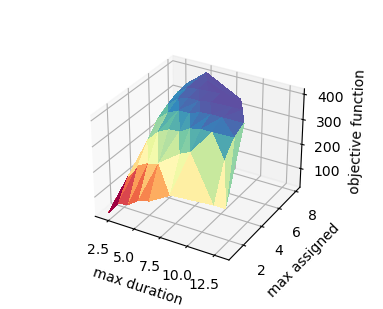

In [60]:
def find_model(non_dominated_models, max_duration, max_assigned):
    for model in non_dominated_models : 
        if model["max_duration"] == max_duration and model["max_assigned"] == max_assigned : 
            return model
    raise ValueError("Model not found")

def plot_surface(non_dominated_models, highlight_duration=None, highlight_assigned=None):
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()

    x, y, z = [], [], []

    for model in non_dominated_models:
        if model["max_duration"] >= 1 and model["max_assigned"] >= 1 and model["objVal"] > 0:
            x.append(model["max_duration"])
            y.append(model["max_assigned"])
            z.append(model["objVal"])

    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    ax = plt.axes(projection ='3d', computed_zorder=False)
    ax.plot_trisurf(x, y, z, cmap=plt.cm.Spectral, antialiased=False)
    if highlight_assigned is not None and highlight_duration is not None : 
        ax.scatter3D([highlight_duration], [highlight_assigned], [find_model(non_dominated_models, highlight_duration, highlight_assigned)["objVal"]], s=20, color="black")

    ax.set_xlabel("max duration")
    ax.set_ylabel("max assigned")
    ax.set_zlabel("objective function")

    plt.show()

plot_surface(non_dominated_models)

### Explore the plannings on the surface

Objective value : 412.96500000000003


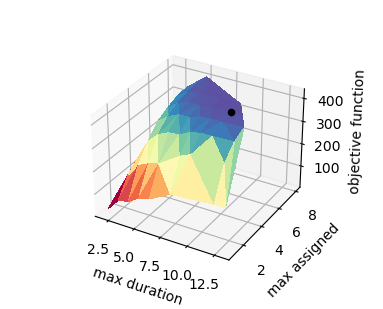

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Olivia,None,None,C,C,A,C,A,C,A,A,C,A,A,A,A,A,A,A,A,A,A,None
Liam,None,None,D,D,D,D,D,D,D,D,D,D,E,E,D,D,E,E,E,E,E,D
Emma,B,B,B,H,H,H,H,None,None,H,H,H,H,H,H,H,B,B,H,B,B,None
Noah,I,J,J,J,J,J,J,I,I,I,J,J,G,G,G,G,G,G,D,D,D,D
Amelia,J,G,G,J,J,G,J,J,J,J,G,E,E,E,None,None,E,G,E,F,E,E


In [59]:
max_duration = 10
max_assigned = 5

current_model = find_model(non_dominated_models, max_duration, max_assigned)

print("Objective value :", current_model["objVal"])
plot_surface(non_dominated_models, max_duration, max_assigned)
display_time_table(data, current_model)